# 3. Titanic Survival Problem with Neural Networks

## 3.1. In a nutshell: Neural Networks (NN)

Before we start introducing the **Neural Networks**, it is worth discussing about **regression** and **categorisation** models.

The **regression** algorithms (or models) are used to discover trends and patterns in data, or relationships between features (e.g.the dependency between the **temperature** and **month** throughout the year). As soon as these patterns, trends and relationships in data are discovered, the **regression** algorithms are used to make estimations based on numbers.

As opposed to the regression models, the **categorisation** (or classification) models are used classify objects into categories based on their features (e.g. is this email a spam?).

Neural Networks can be used for both **regression** and **categorisation** problems. They are widely used in medical diagnosis (based on symptons), speech recognition, natural language processing and translation. Neural Networks are made of layers of nodes sending data to each other in a similar way the human brain neurons communicate through synapses. 

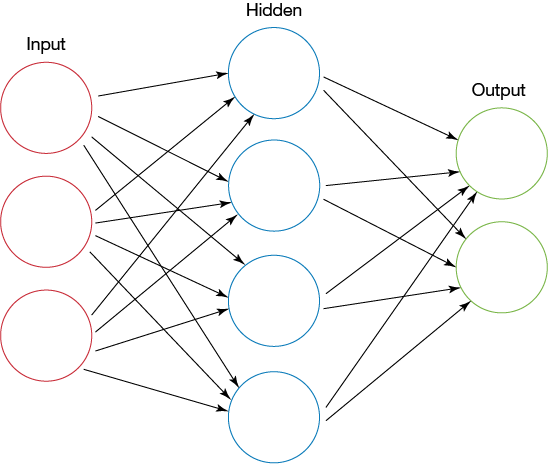

A Neural Network structure is comprised of 3 types of layers: **input**, **hidden** and **output** layers. The **input** layer takes the features from examples (e.g. heights, weights, temperatures). Therefore, the number of nodes in the input layer should be equal to the number of features. The **output** layer is where the outcome is released and should be made up of the same number of nodes as labels are. The **hidden** layers is the place where data travels through. A Neural Network structure could contain as many hidden layers as needed, and a hidden layer could be made up of as many nodes as necessary. The optimal structure is achieved through multiple experimantations (we will experiment on that later on).

The transfer of data between nodes (see the black arrows in the picture above) from one layer to another is made through **edges** (or synapses by an analogy with the human brain). Each of these edges has a different **weight** (coefficient) which starts as a random value and then it's optimised to give more occurate outcomes.

## 3.2. Resolve the Titanic Survival problem with Neural Networks

In order to build a Neural Network, we will be working with **Keras** which is an open source library written in Python. This library provides many ready-to-use elements from a Neural Network structure such as layers, activation functions (i.e. which defines the output of a node, or "neuron"), optimizers. As a result of this, the development of a prediction model will be much easier. 

Please execute the code below to initilize our functions.

In [13]:
# Run this code - please don't change anything
import warnings
warnings.filterwarnings("ignore")
import tensorflow as tf
import keras
print('keras using %s backend'%keras.backend.backend())
import pandas as pd
import numpy as np
import matplotlib.pyplot as graph
%matplotlib inline
graph.rcParams['figure.figsize'] = (15,5)
graph.rcParams["font.family"] = 'DejaVu Sans'
graph.rcParams["font.size"] = '12'
graph.rcParams['image.cmap'] = 'rainbow'

keras using tensorflow backend


### 3.2.1. Prepare the data

#### Step 1
As a first step, let's get started by loading the data from a **csv** file. Then, let's print it out on the screen.

In [14]:
# Load the dataset - please replace the '*' in the line below with the data file name: 'titanic.csv' (including quotes)
rawTitanicData = pd.read_csv('titanic.csv')

#Write titanicData.head(---the number of top values you want to print ---)#
#E.g. If you want to print the top 10 values, please write titanicData.head(10)
rawTitanicData.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


If you are unable clearly read and understand the data, please see below the Excel representation of it.

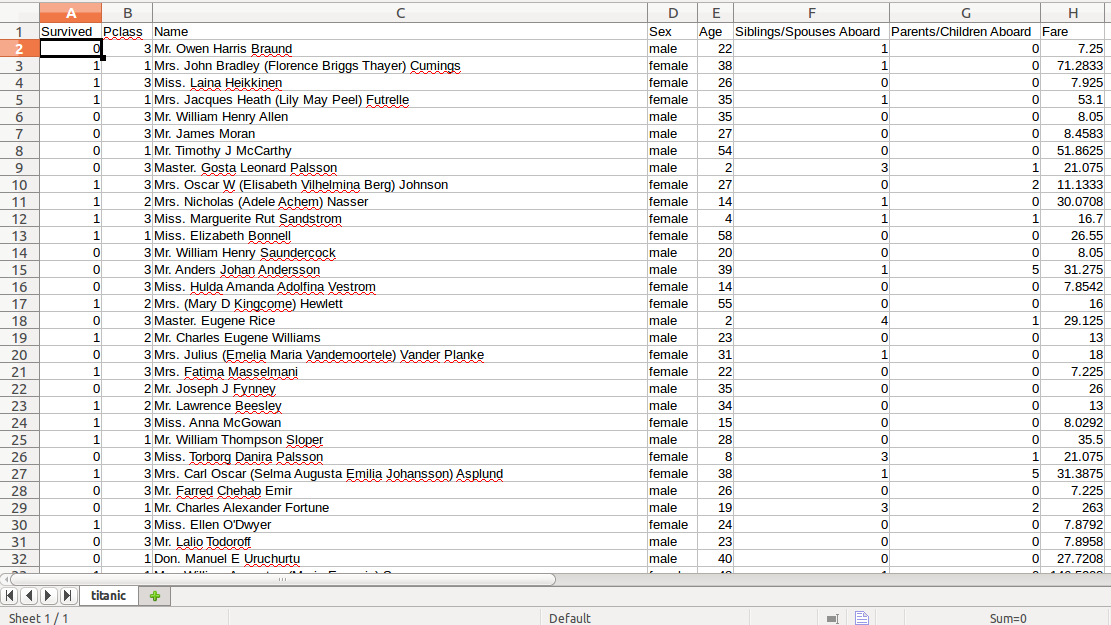

Within this data set, there are **887** examples of people who either survived or died. Each of these examples has **features** (i.e.travel class, name, sex, age, siblings/spouses aboard, parents/children aboard, fare) as well as **labels** (i.e. survived or not represented by 1 and respectively 0).

#### Step 2

Within Step 2, our purpose is to get rid of redundant features. As you may probably noticed already, the **name** is an irelevant feature, and we need to get rid of it.

In [15]:
#Run this code and replace the * with the name of column you want to drop including quotes (e.g. titanicData.drop(columns=['Name']))
titanicData = rawTitanicData.drop(columns=['Name'])

titanicData.head()

,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


#### Step 3

Now that we got rid of the useless features, we need to make a distinction between the different types of features: **continuous**, **ordinal** and **nominal**. Continuous features are those whose values have not well-defined boundaries. In our case, the **age, siblings/spouses aboard, parents/children aboard and fare** are **continuous** features. 

**Ordinal** features are those who have some order associated with them. In our case, the **passenger class** feature (i.e. 1st, 2nd, 3rd) indicates the socio-economic class of each individual.

**Nominal** features are representative for groups where no natural order could be defined (e.g. dog breed, wheather, genre). In our case, the **sex** and **survived** features are the only ones of this kind.

Now that we identified the 3 distinct types of data, we can apply different **encoding schemes** on them. The **continuous** values do not need to be encoded as there exists a natural order amongst them (e.g. a 38-year-old female will always be older than a 35-year-old male as 38 > 35). The same rationale is applicable for **ordinal** features. When it comes to nominal values, relations such as **male < female** make no sense. If we encode males with 0s and females with 1s, even though 0 < 1 is correct in algebra, in our case it would make no sense. In this case we'll use a **one-hot** encoding method.

In [16]:
#Run the code below to transform 'male' values into 0s and 'female' values into 1s
titanicData = titanicData.replace("male", 0)
titanicData = titanicData.replace("female", 1)
titanicData.head()

,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,0,22.0,1,0,7.2500
1,1,1,1,38.0,1,0,71.2833
2,1,3,1,26.0,0,0,7.9250
3,1,1,1,35.0,1,0,53.1000
4,0,3,0,35.0,0,0,8.0500


In [28]:
#Run this code now to encode the gender value into one-hot vectors
from sklearn.preprocessing import OneHotEncoder

labelsGender = np.array(titanicData['Sex'])

onehotGender = OneHotEncoder(sparse = False).fit_transform(np.transpose([labelsGender]))

encodedTitanicData = titanicData.rename(index=str, columns={"Sex": "Male"})

encodedTitanicData['Male'] = onehotGender

#encodedTitanicData = titanicData.insert(3, "Female", 0)

encodedTitanicData['Female'] = np.where(encodedTitanicData['Male'] == 0.0, 1.0, 0.0)

encodedTitanicData


,Survived,Pclass,Male,Female,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,1.0,0.0,22.0,1,0,7.2500
1,1,1,0.0,1.0,38.0,1,0,71.2833
2,1,3,0.0,1.0,26.0,0,0,7.9250
3,1,1,0.0,1.0,35.0,1,0,53.1000
4,0,3,1.0,0.0,35.0,0,0,8.0500
5,0,3,1.0,0.0,27.0,0,0,8.4583
6,0,1,1.0,0.0,54.0,0,0,51.8625
7,0,3,1.0,0.0,2.0,3,1,21.0750
8,1,3,0.0,1.0,27.0,0,2,11.1333
9,1,2,0.0,1.0,14.0,1,0,30.0708


In [35]:
#Repeat the same rationale and change the code below to apply the one-hot to 'survived' features.
labelsSurvived = np.array(titanicData['Survived'])

onehotSurvived = OneHotEncoder(sparse = False).fit_transform(np.transpose([labelsSurvived]))

print(onehotSurvived[:5])

[[1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]]


#### Step 4

Let's split our dataset into **training** and **test** sets. As the name suggests, the **training** data is used to train an algorithm to provide accurate predictions. The trained model will be therefore tested by using the **test** data.

We've got **887** records (i.e. people), so we'll use **700** records for training and the rest of **187** for testing.

Execute the code below to create these sets.

In [39]:
#Split the dataset into features and labels
features = encodedTitanicData.drop(columns=['Survived'])

# This takes the first 700 examples for our training set
train_features = features.values[:700]
train_labels = onehotSurvived[:700]

# This takes the last 187 examples of the 887 for our test set
test_features = features.values[160:]
test_labels = onehotSurvived[160:]

In [40]:
# Set a randomisation seed for replicatability.
np.random.seed(7)

# This creates our base model for us to add to
###--- REPLACE THE ??? BELOW WITH Sequential() ---###
model = keras.models.Sequential()
###

###--- REPLACE THE ???s BELOW WITH THE APPROPRIATE NUMBERS OF NODES ---###
# structure = [input nodes, hidden1 nodes, hidden2 nodes, output nodes]
structure = [7 ,4, 2, 2]
###

# Input layer + hidden layer 1
model.add(keras.layers.Dense(units=structure[1], input_dim = structure[0], activation = 'relu'))

# Hidden layer 2
model.add(keras.layers.Dense(units=structure[2], activation = 'relu'))

# Output layer - note that the activation function is softmax
# Softmax will predict a category and provide a value for how likely this is the correct prediction.
model.add(keras.layers.Dense(units=structure[3], activation = tf.nn.softmax))

print("Layer structure:", structure)

Layer structure: [7, 4, 2, 2]


In [41]:
# Let's compile the model

###--- REPLACE THE ???'s BELOW WITH 'categorical_crossentropy', 'sgd', AND THEN 'accuracy' (INCLUDING THE QUOTES) ---###
model.compile(loss = 'categorical_crossentropy', optimizer = 'sgd', metrics = ['accuracy'])
###

# Time to fit the model
print('Starting training')

###--- REPLACE THE ??? BELOW WITH train_X AND THEN train_Y ---###
training_stats = model.fit(train_features, train_labels, batch_size = 1, epochs = 24, verbose = 0)
###

print('Training finished')
print('Training Evaluation: loss = %0.3f, accuracy = %0.2f%%'
      %(training_stats.history['loss'][-1], 100 * training_stats.history['acc'][-1]))

Starting training
Training finished
Training Evaluation: loss = 0.592, accuracy = 66.43%


In [42]:
###--- REPLACE THE ???'s BELOW WITH test_X AND test_Y ---###
evaluation = model.evaluate(test_features, test_labels, verbose=0)
###

print('Test Set Evaluation: loss = %0.6f, accuracy = %0.2f' %(evaluation[0], 100*evaluation[1]))

Test Set Evaluation: loss = 0.549946, accuracy = 70.43
